In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [34]:
data=pd.read_csv("/Users/erdemtasdelen/Downloads/Mall_Customers.csv")
veri=data.copy()
print(veri)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [35]:
veri=veri.drop(columns="CustomerID",axis=1)
print(veri.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


In [36]:
X=veri.iloc[:,1:3]
print(X)

     Age  Annual Income (k$)
0     19                  15
1     21                  15
2     20                  16
3     23                  16
4     31                  17
..   ...                 ...
195   35                 120
196   45                 126
197   32                 126
198   32                 137
199   30                 137

[200 rows x 2 columns]


In [37]:
wcss=[]


In [38]:
for k in range(1,20):
    kmodel=KMeans(n_clusters=k,random_state=0)
    kmodel.fit(X)
    wcss.append(kmodel.inertia_)
    

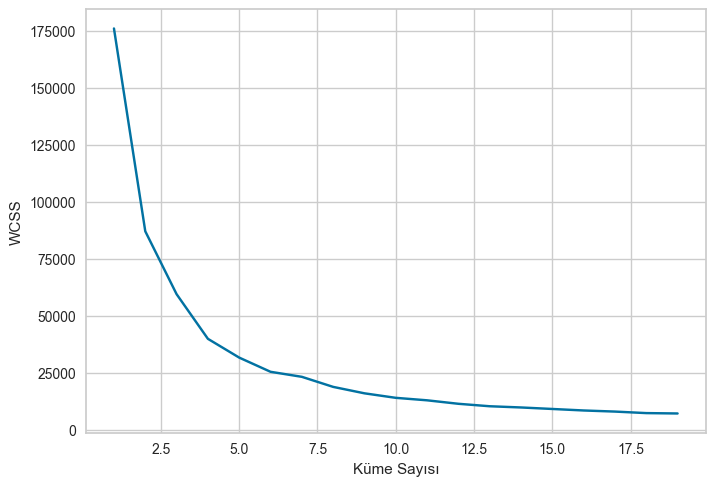

In [39]:
plt.plot(range(1,20), wcss)
plt.xlabel("Küme Sayısı")
plt.ylabel("WCSS")
plt.show()

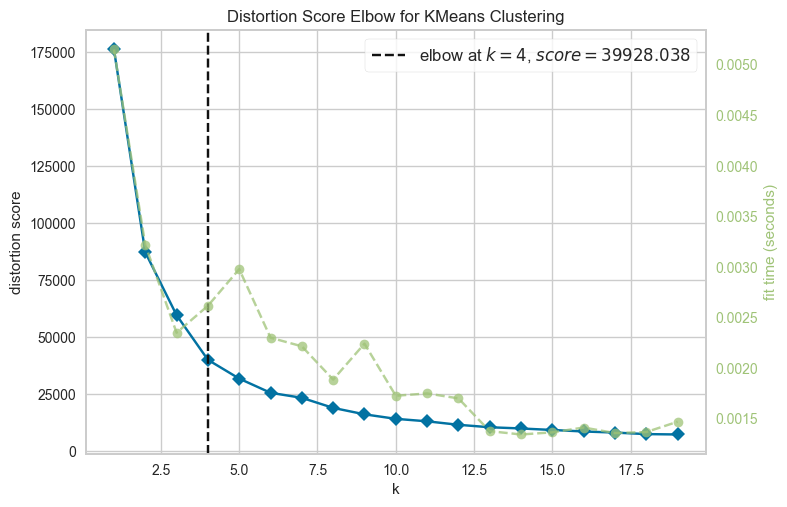

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
kmodel=KMeans(random_state=0)
grafik=KElbowVisualizer(kmodel,k=(1,20))
grafik.fit(X)
grafik.poof()